In [169]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

1. How punctual/consistent are the trains in each divisions from 2020-2024?

> [OBJECT] division -- The A Division (numbered subway lines and S 42nd) and B Division (lettered subway lines) [text]
> [FLOAT] additional_platform_time -- The AVERAGE estimated additional time in minutes (above scheduled time) customers wait for their train, reported each month and on each line.


> [F] total_apt -- The TOTAL NUMBER of estimated additional time in minutes (above scheduled time) customers wait for their train, reported each month and on each line.
> [F] num_passengers -- Total number of estimated passengers reported each month and on each line.

In [170]:
# Importing the dataset
mta = pd.read_csv("../data/MTA_Subway_Customer_Metrics_2020-2024.csv")

In [171]:
# Displaying the first few rows of dataset
mta.head()

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2024-12-01,A DIVISION,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.40,0.127749,0.872251
1,2024-12-01,A DIVISION,1,peak,5552918.0,1.020276,0.662142,5665509.0,3676820.8,624175.44,0.112405,0.887595
2,2024-12-01,A DIVISION,2,offpeak,3078700.2,1.425670,0.726788,4389210.5,2237562.2,555590.80,0.180463,0.819537
3,2024-12-01,A DIVISION,2,peak,3672602.5,1.147720,0.448690,4215117.5,1647861.6,483096.44,0.131541,0.868459
4,2024-12-01,A DIVISION,3,offpeak,2344247.5,0.984354,0.456582,2307569.0,1070340.6,293768.30,0.125315,0.874685


In [172]:
# Checking the data types of the columns 
mta.dtypes

month                                 object
division                              object
line                                  object
period                                object
num_passengers                       float64
additional platform time             float64
additional train time                float64
total_apt                            float64
total_att                            float64
over_five_mins                       float64
over_five_mins_perc                  float64
customer journey time performance    float64
dtype: object

In [173]:
# Statistics of dataset and selected rows for EDA
mta.describe()

,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
count,2.856000e+03,2856.000000,2856.000000,2.856000e+03,2.856000e+03,2.856000e+03,2856.000000,2856.000000
mean,2.188061e+06,1.251518,0.276823,2.903727e+06,9.339990e+05,3.404776e+05,0.145785,0.854215
std,1.450171e+06,0.454368,0.482434,2.065435e+06,1.258208e+06,2.435442e+05,0.059847,0.059847
min,3.017300e+03,-0.431496,-2.213688,-7.396448e+03,-3.060992e+06,4.630000e+01,0.000112,0.682048
25%,1.091265e+06,0.962920,0.024190,1.284948e+06,5.169300e+03,1.451870e+05,0.107274,0.808143
50%,2.049147e+06,1.223633,0.339261,2.804886e+06,6.263841e+05,3.103827e+05,0.146694,0.853306
75%,3.184311e+06,1.540595,0.598394,4.261219e+06,1.605923e+06,5.129739e+05,0.191857,0.892726
max,8.923406e+06,3.506892,1.584780,1.462646e+07,7.841808e+06,1.274929e+06,0.317952,0.999888


In [174]:
# Checking for null 
mta.isnull().sum()

month                                0
division                             0
line                                 0
period                               0
num_passengers                       0
additional platform time             0
additional train time                0
total_apt                            0
total_att                            0
over_five_mins                       0
over_five_mins_perc                  0
customer journey time performance    0
dtype: int64

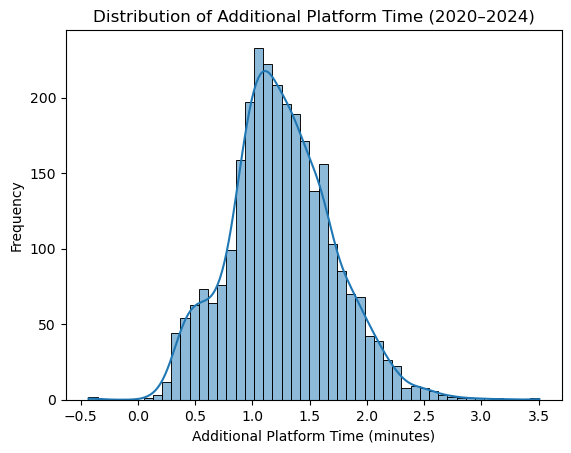

In [175]:
sns.histplot(data=mta, x="additional platform time", kde=True)
plt.title("Distribution of Additional Platform Time (2020–2024)")
plt.xlabel("Additional Platform Time (minutes)")
plt.ylabel("Frequency")
plt.show()

In [176]:
#Preparing for correlation analysis by making 'divisions' binary
mta.division[mta.division == "A DIVISION"] = 1
mta.division[mta.division == "B DIVISION"] = 0


#correlation analysis
cor_division_avg = mta["division"].corr(mta["additional platform time"], method="pearson")
print('Correlation for Divison Average is', cor_division_avg)

Correlation for Divison Average is -0.2691385861626625


C:\Users\jahai\AppData\Local\Temp\ipykernel_36812\4160861174.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  mta.division[mta.division == "A DIVISION"] = 1
C:\Users\jahai\AppData\Local\Temp\ipykernel_36812\4160861174.py:2: SettingWithCop

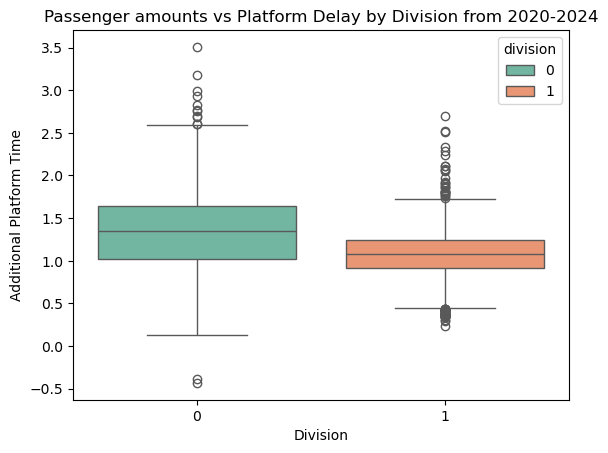

In [186]:
sns.boxplot(data=mta, x="division", y="additional platform time", hue ="division", palette="Set2")
plt.title("Passenger amounts vs Platform Delay by Division from 2020-2024")
plt.xlabel("Division")
plt.ylabel("Additional Platform Time")
plt.show()

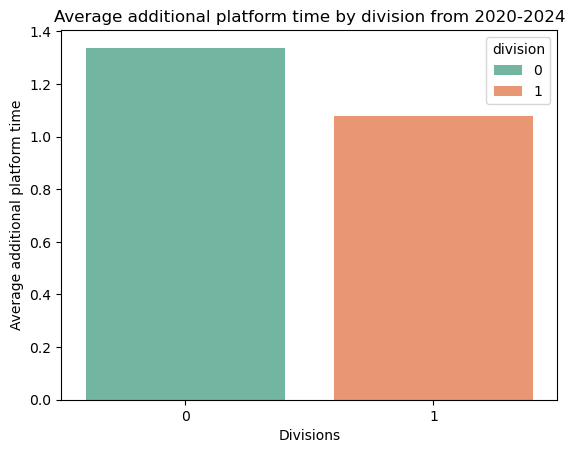

In [187]:
#grouping by divisions and calculating the mean of additional platform time
division_delays = mta.groupby("division")["additional platform time"].mean().reset_index()

sns.barplot( data = division_delays, x = "division", y = "additional platform time", hue= "division", palette = "Set2")
plt.title("Average additional platform time by division from 2020-2024")
plt.xlabel("Divisions")
plt.ylabel("Average additional platform time")  
plt.show()


From the bar charts we can observe that Division B (lettered subway lines) is the line that averages the most additional platform time from 2020-2024. 

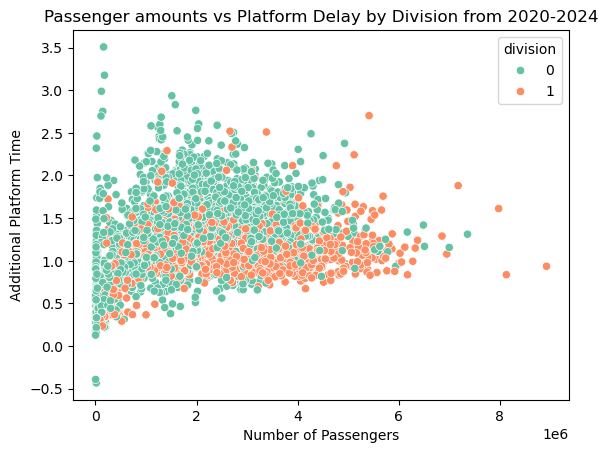

0.2510009938163841


In [188]:
sns.scatterplot(data=mta, x="num_passengers", y="additional platform time", hue='division', palette="Set2")
plt.title("Passenger amounts vs Platform Delay by Division from 2020-2024")
plt.xlabel("Number of Passengers")
plt.ylabel("Additional Platform Time")
plt.show()

# Correlation value
cor_passengers_apt = mta["num_passengers"].corr(mta["additional platform time"], method="pearson")
print(cor_passengers_apt)

Pearsons coifficent of .25 depicts a weak positive correlation indicating that there is not a strong effect between number of passengers and average additional platform times from 2020-2024. Our scatter plot indicates that subway lines with more passengers are observed to have an increase in the average additional platform time. However, there may be other factors influencing this delay. 

In [ ]:
#Grouping by divisions 
mta_divisions = mta.groupby('division') 

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance,year
0,2024-12-01,1,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.40,0.127749,0.872251,2024
1,2024-12-01,1,1,peak,5552918.0,1.020276,0.662142,5665509.0,3676820.8,624175.44,0.112405,0.887595,2024
2,2024-12-01,1,2,offpeak,3078700.2,1.425670,0.726788,4389210.5,2237562.2,555590.80,0.180463,0.819537,2024
3,2024-12-01,1,2,peak,3672602.5,1.147720,0.448690,4215117.5,1647861.6,483096.44,0.131541,0.868459,2024
4,2024-12-01,1,3,offpeak,2344247.5,0.984354,0.456582,2307569.0,1070340.6,293768.30,0.125315,0.874685,2024


2. How punctual/consistent are the trains in each divisions from 2015-2019? 

In [181]:
#importing the datasets
mta_2020 = pd.read_csv("../data/MTA_Subway_Customer_Metrics_2020-2024.csv")
mta_2015 = pd.read_csv("../data/MTA_Subway_Customer_Metrics__2015-2019.csv")

In [182]:
mta_combined = pd.concat([mta_2020, mta_2015])
mta_combined.to_csv("../data/mta_combined.csv", index=False)

# Displaying the first few rows of the combined dataset
mta_combined.head()

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2024-12-01,A DIVISION,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.40,0.127749,0.872251
1,2024-12-01,A DIVISION,1,peak,5552918.0,1.020276,0.662142,5665509.0,3676820.8,624175.44,0.112405,0.887595
2,2024-12-01,A DIVISION,2,offpeak,3078700.2,1.425670,0.726788,4389210.5,2237562.2,555590.80,0.180463,0.819537
3,2024-12-01,A DIVISION,2,peak,3672602.5,1.147720,0.448690,4215117.5,1647861.6,483096.44,0.131541,0.868459
4,2024-12-01,A DIVISION,3,offpeak,2344247.5,0.984354,0.456582,2307569.0,1070340.6,293768.30,0.125315,0.874685


In [183]:
# Checking for missing values in the dataset
mta_combined.isnull().sum() 

month                                0
division                             0
line                                 0
period                               0
num_passengers                       0
additional platform time             0
additional train time                0
total_apt                            0
total_att                            0
over_five_mins                       0
over_five_mins_perc                  0
customer journey time performance    0
dtype: int64

In [ ]:

mta["month"] = pd.to_datetime(mta["month"])

# Extract the year and assign to a new column
mta["year"] = mta["month"].dt.year
mta.head()
